In [1]:
# Importing libraries
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set_palette("husl")

os.makedirs("figures", exist_ok=True)

In [3]:
def load_data():
    df = pd.read_csv(
        "../../1_datasets/processed_data/BNPL_intention_to_use_cleaned.csv"
    )
    return df

In [4]:
def overview_and_visualizations(df):
    # Overview: histograms for all columns (Likert scale)
    fig, axes = plt.subplots(1, min(5, len(df.columns)), figsize=(20, 4))
    for i, col in enumerate(df.columns[:5]):
        sns.histplot(df[col], bins=7, kde=False, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("Response")
        axes[i].set_ylabel("Count")
    plt.tight_layout()
    plt.savefig("figures/likert_first5.png")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap="RdYlBu_r", fmt=".2f", square=True)
    plt.title("Correlation Matrix of Survey Items")
    plt.tight_layout()
    plt.savefig(
        "figures/bnpl_intention_correlation_heatmap.png", dpi=300, bbox_inches="tight"
    )
    plt.show()

    return df.columns.tolist()

In [5]:
def group_analysis(df):
    # Group by Likert construct prefix (e.g., FL, PE, EE, etc.)
    prefixes = sorted(set(col[:2] for col in df.columns))
    for prefix in prefixes:
        cols = [col for col in df.columns if col.startswith(prefix)]
        if len(cols) > 1:
            df[prefix + "_mean"] = df[cols].mean(axis=1)
            plt.figure(figsize=(8, 5))
            sns.histplot(df[prefix + "_mean"], bins=7, kde=True)
            plt.title(f"Mean {prefix} Score Distribution")
            plt.xlabel(f"{prefix} Mean Score")
            plt.ylabel("Count")
            plt.tight_layout()
            plt.savefig(f"figures/{prefix}_mean_score_dist.png")
            plt.show()

In [6]:
def summary_statistics(df, columns):
    print("\n" + "=" * 60)
    print("📊 SUMMARY STATISTICS")
    print("=" * 60)
    print("\n📈 Summary statistics for Likert-scale items:")
    print(df[columns].describe())
    # Percentage breakdown for each item
    for col in columns:
        print(f"\nPercentage breakdown for {col}:")
        print(df[col].value_counts(normalize=True) * 100)

In [7]:
def save_processed_data(df):
    df.to_csv("figures/bnpl_intention_explored.csv", index=False)
    print(
        "\n✅ Exploration complete! Processed data saved to 'figures/bnpl_intention_explored.csv'"
    )
    print("📊 Visualizations saved as PNG files in the 'figures/' directory")

In [8]:
def main():
    df = load_data()
    columns = overview_and_visualizations(df)
    group_analysis(df)
    summary_statistics(df, columns)
    save_processed_data(df)

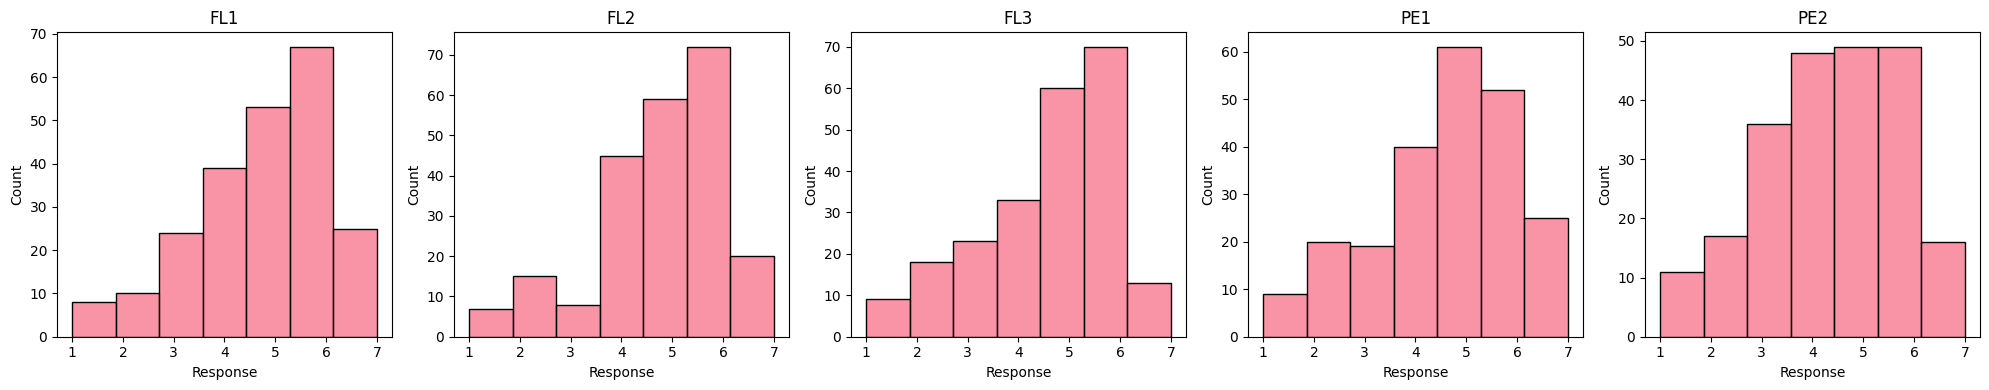

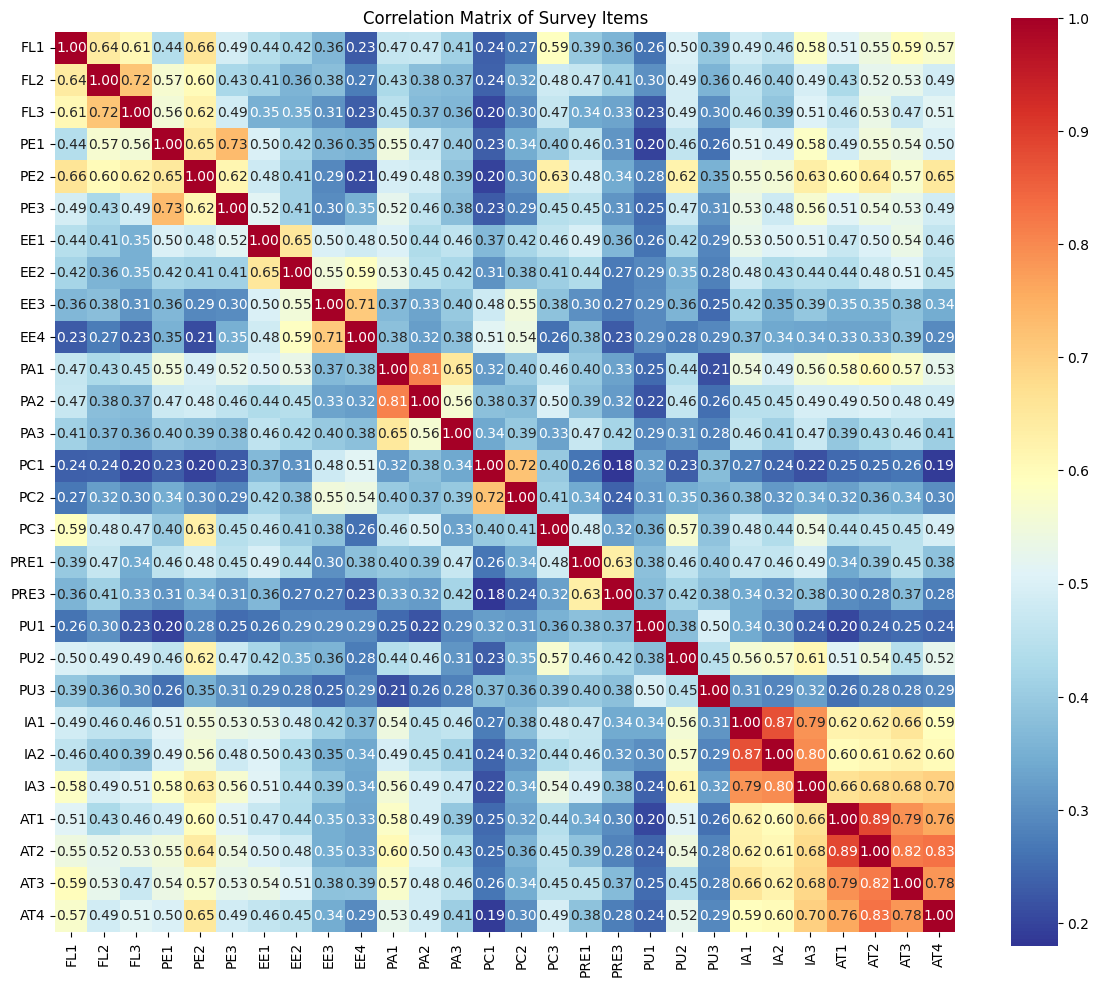

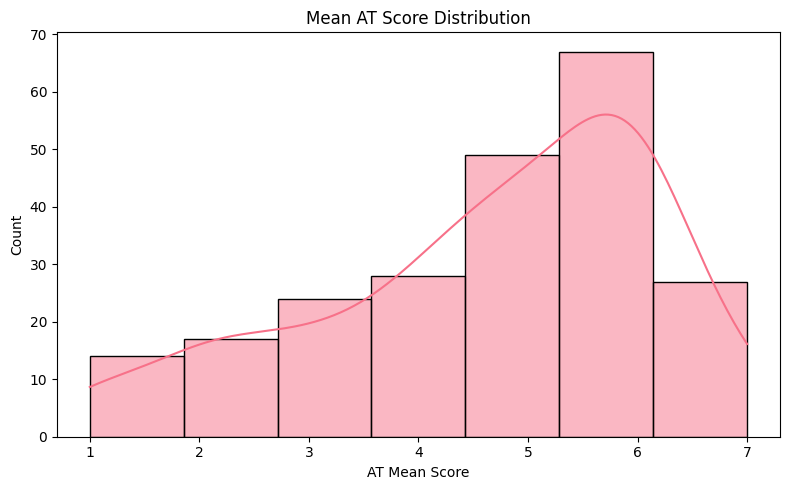

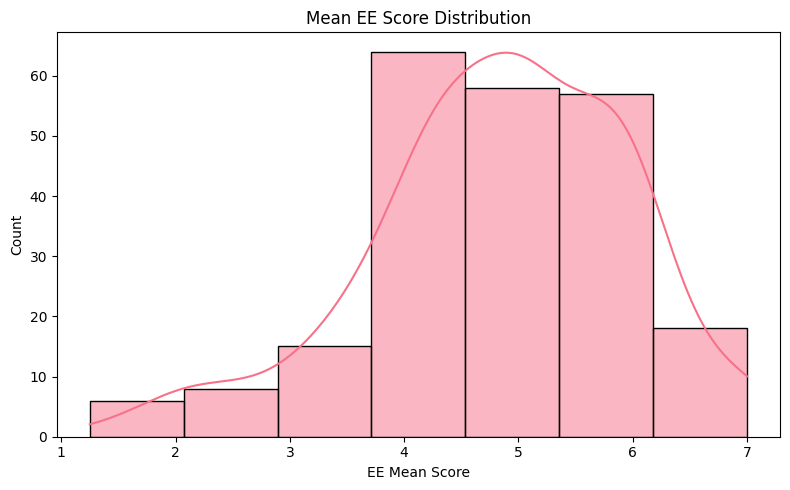

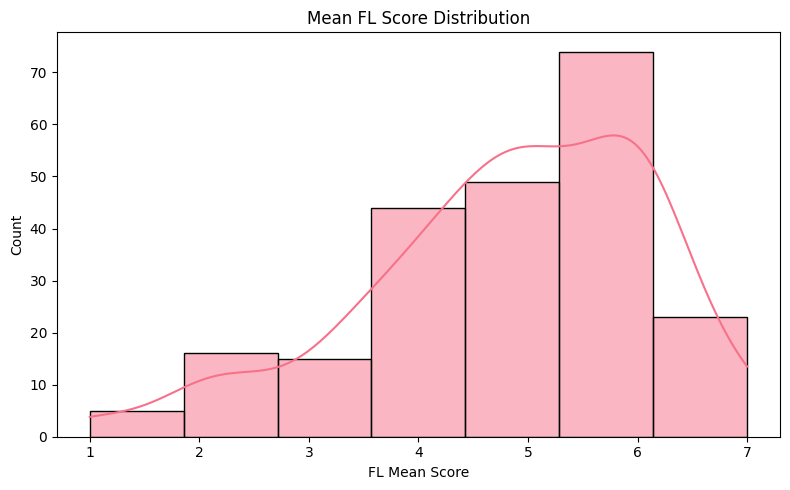

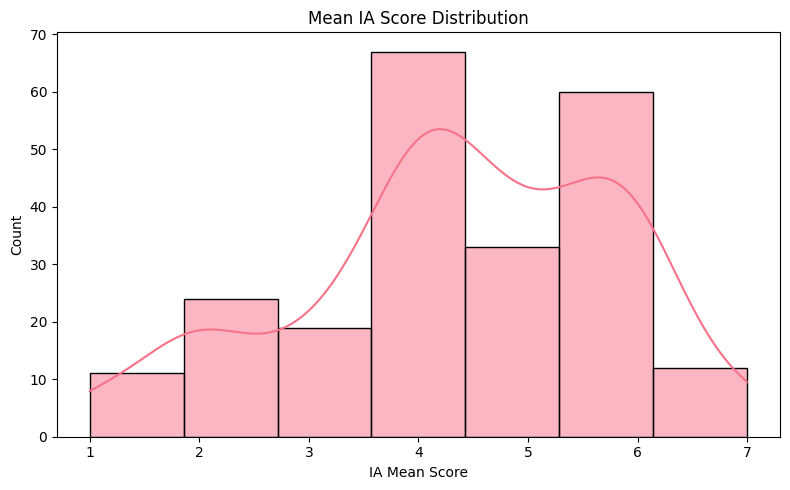

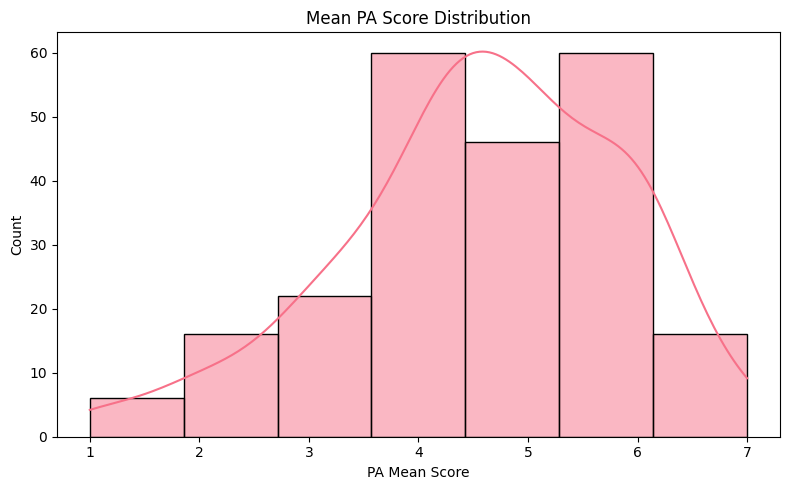

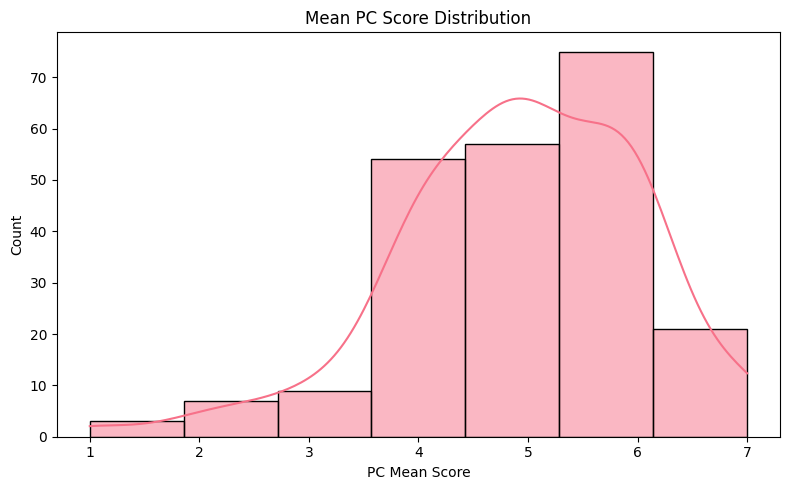

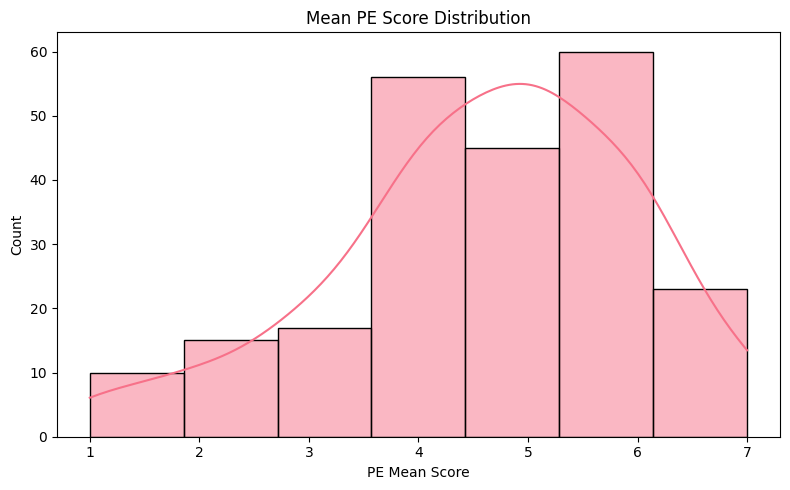

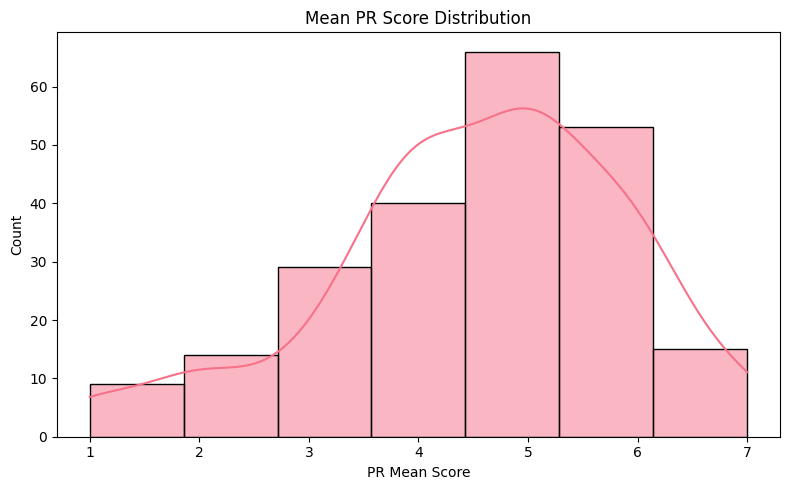

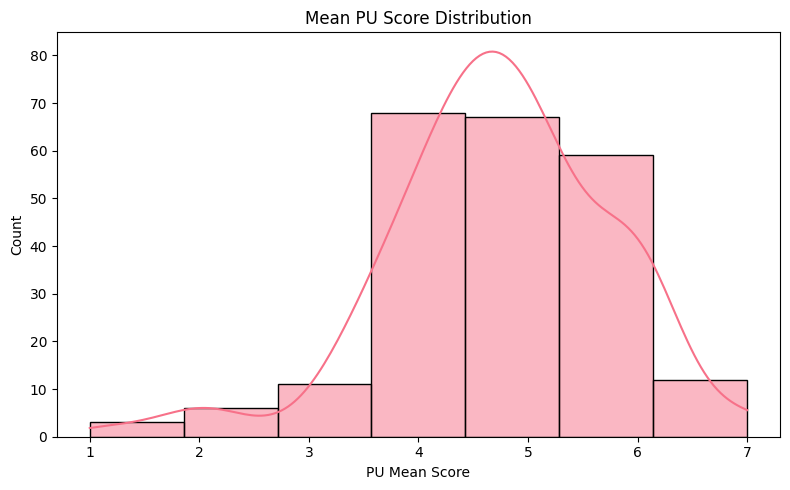


📊 SUMMARY STATISTICS

📈 Summary statistics for Likert-scale items:
              FL1         FL2         FL3         PE1         PE2         PE3  \
count  226.000000  226.000000  226.000000  226.000000  226.000000  226.000000   
mean     4.858407    4.902655    4.676991    4.681416    4.407080    4.703540   
std      1.513596    1.451219    1.533942    1.590335    1.569924    1.542202   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    4.000000    4.000000    4.000000    3.000000    4.000000   
50%      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   
75%      6.000000    6.000000    6.000000    6.000000    6.000000    6.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

              EE1         EE2         EE3         EE4  ...         PU1  \
count  226.000000  226.000000  226.000000  226.000000  ...  226.000000   
mean     4.774336    4.694690    4.871681    4.991150 

In [9]:
if __name__ == "__main__":
    main()